# Modelos de Clasificación con scikit-learn

Este notebook entrena y evalúa tres modelos: Regresión Logística, K-Nearest Neighbors (KNN) y Support Vector Machine (SVM), usando el dataset de cáncer de mama de scikit-learn. Se calcula `accuracy` y se visualiza la matriz de confusión para cada modelo.


In [9]:
# 1. Importación de Librerías
# Modelos y datasets
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# División y evaluación
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Visualización y tabulación
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [10]:
# 2. Carga y Definición de Datos (X e Y)
# Carga el dataset de cáncer de mama preprocesado de scikit-learn.
# X contiene las características numéricas y Y la etiqueta binaria (0: benigno, 1: maligno).
cancer = load_breast_cancer()
X = cancer.data  # características
Y = cancer.target  # objetivo (0: benigno, 1: maligno)
# print(X.shape); print(cancer.feature_names)  # Para explorar dimensiones y nombres de atributos


In [11]:
# 3. División del Conjunto de Datos (Train-Test Split)
# Se separa el conjunto en entrenamiento (70%) y prueba (30%).
# random_state fija la aleatoriedad para reproducibilidad; stratify mantiene la proporción de clases.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)
X_train.shape, X_test.shape


((398, 30), (171, 30))

In [12]:
# 4. Modelo 1: Regresión Logística (RL)
# Entrena un clasificador lineal para estimar probabilidad de clase y decidir con umbral 0.5.
# solver='liblinear' es estable para datasets pequeños/medianos; max_iter asegura convergencia.
modelo_RL = LogisticRegression(solver='liblinear', max_iter=1000)
modelo_RL.fit(X_train, Y_train)

# Predicción y evaluación
prediccion_RL = modelo_RL.predict(X_test)
AS_RL = accuracy_score(Y_test, prediccion_RL)
cm_RL = confusion_matrix(Y_test, prediccion_RL)
AS_RL


0.9415204678362573

In [13]:
# 5. Modelo 2: K-Nearest Neighbors (KNN)
# Clasificador basado en vecinos más cercanos. n_neighbors=3 define K.
modelo_KNN = KNeighborsClassifier(n_neighbors=3)
modelo_KNN.fit(X_train, Y_train)

# Predicción y evaluación
prediccion_KNN = modelo_KNN.predict(X_test)
AS_KNN = accuracy_score(Y_test, prediccion_KNN)
cm_KNN = confusion_matrix(Y_test, prediccion_KNN)
AS_KNN


0.9181286549707602

In [14]:
# 6. Modelo 3: Support Vector Machine (SVM)
# Clasificador de máximo margen. Aquí usamos kernel polinomial de grado 2.
modelo_SVM = SVC(kernel='poly', degree=2)
modelo_SVM.fit(X_train, Y_train)

# Predicción y evaluación
prediccion_SVM = modelo_SVM.predict(X_test)
AS_SVM = accuracy_score(Y_test, prediccion_SVM)
cm_SVM = confusion_matrix(Y_test, prediccion_SVM)
AS_SVM


0.9064327485380117

In [15]:
# 7.b Tabla comparativa de accuracies
# Creamos un DataFrame para resumir y ordenar las precisiones de cada modelo.
resultados = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'KNN (k=3)', 'SVM (poly, grado=2)'],
    'Accuracy': [AS_RL, AS_KNN, AS_SVM]
}).sort_values('Accuracy', ascending=False).reset_index(drop=True)

resultados


,Modelo,Accuracy
0,Regresión Logística,0.941520
1,KNN (k=3),0.918129
2,"SVM (poly, grado=2)",0.906433


In [16]:
# 7. Comparación de Resultados (Accuracy)
# Se reporta el accuracy de cada modelo para comparar su desempeño de forma directa.
print(f"Precisión RL: {AS_RL:.4f}")
print(f"Precisión KNN: {AS_KNN:.4f}")
print(f"Precisión SVM: {AS_SVM:.4f}")


Precisión RL: 0.9415
Precisión KNN: 0.9181
Precisión SVM: 0.9064


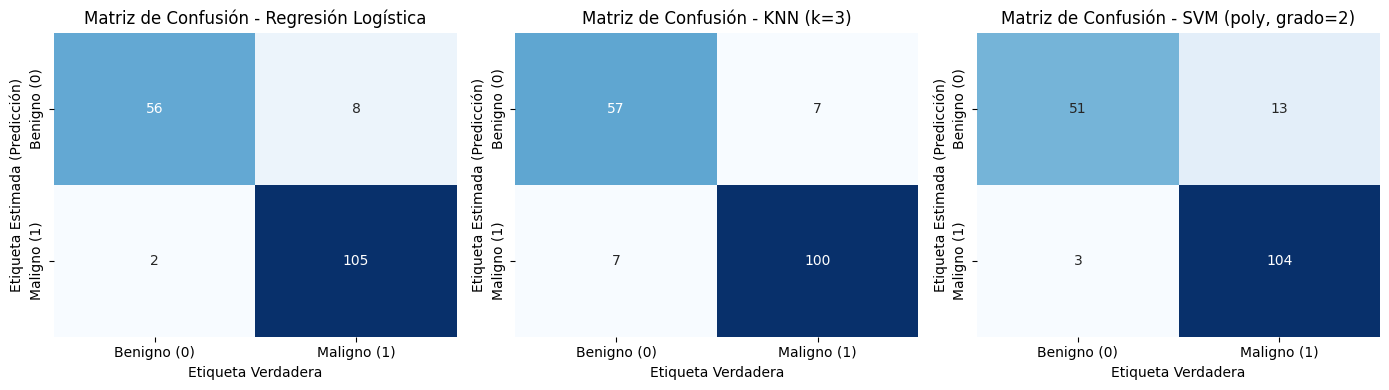

In [17]:
# 8. Visualización: Matrices de Confusión
# Gráficos tipo heatmap para interpretar aciertos/errores por clase.
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

def plot_cm(ax, cm, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benigno (0)', 'Maligno (1)'],
                yticklabels=['Benigno (0)', 'Maligno (1)'], ax=ax)
    ax.set_xlabel('Etiqueta Verdadera')
    ax.set_ylabel('Etiqueta Estimada (Predicción)')
    ax.set_title(title)

plot_cm(axes[0], cm_RL, 'Matriz de Confusión - Regresión Logística')
plot_cm(axes[1], cm_KNN, 'Matriz de Confusión - KNN (k=3)')
plot_cm(axes[2], cm_SVM, 'Matriz de Confusión - SVM (poly, grado=2)')
plt.tight_layout()
plt.show()
